# **Tarea 3 - Análisis de datos con python**

Maestría en Matemáticas Aplicadas e Industriales

Alumno: Brandon Eduardo Antonio Gómez


# 1. Guarde en un Dataframe los datos de los precios de las acciones de Tesla (TSLA.csv en Github) y realice lo siguiente:

* Obtenga el precio de cierre más alto y el precio de cierre más bajo a partir del 2020.

* Obtenga las gráficas de las series de tiempo de cada año utilizando subplots.

* Obtenga las gráficas de caja por mes de los precios de cierre del 2022.

* ¿Los precios de cierre de todo el 2022 se distribuyen normalmente? Justifique su respuesta.

In [12]:
# se importan las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



##  Obtenga el precio de cierre más alto y el precio de cierre más bajo a partir del 2020.


In [13]:
ruta_TESLA = "https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/tesla.csv"

df_Tesla = pd.read_csv(ruta_TESLA)
df_Tesla.head( )

,Date,Open,High,Low,Close,Adj Close
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


In [14]:
df_Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       756 non-null    object 
 1   Open       756 non-null    float64
 2   High       756 non-null    float64
 3   Low        756 non-null    float64
 4   Close      756 non-null    float64
 5   Adj Close  756 non-null    float64
dtypes: float64(5), object(1)
memory usage: 35.6+ KB


In [15]:
# se convierte a dato temporal o formato: fecha/hora
df_Tesla['Date'] = pd.to_datetime(df_Tesla['Date'])

In [16]:
df_Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Close      756 non-null    float64       
 5   Adj Close  756 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 35.6 KB


In [17]:
# tambíen se puede forzar desde el inicio usando parse_dates para usar datos temporales
ruta_TESLA = "https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/tesla.csv"
df_Tesla = pd.read_csv(ruta_TESLA, parse_dates= True, index_col=0) # parse_dates: le dice que la columna ya es fecha (línea de tiempo) forza a python para tomar dato temporal
df_Tesla.head() # muestra los primeros 5

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


### Precios más altos

In [18]:
# obtener los precios a partir del 2020
df_Tesla_2020 = df_Tesla.loc['2020-01-01':] # .loc: da el acceso por etiqueta
df_Tesla_2020.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


In [19]:
# La fecha donde se obtienen los precios más altos a partir del 2020 es
df_Tesla_2020.idxmax()

,0
Open,2021-11-04
High,2021-11-04
Low,2021-11-04
Close,2021-11-04
Adj Close,2021-11-04


In [20]:
# La fecha de cierre más alta a partir del 2020 es
df_Tesla_2020.idxmax()[3]

/tmp/ipython-input-20-1564316573.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla_2020.idxmax()[3]


Timestamp('2021-11-04 00:00:00')

In [21]:
# precios más altos a partir del 2020 es
df_Tesla_2020.loc[df_Tesla_2020.idxmax()[3]]

/tmp/ipython-input-21-694932429.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla_2020.loc[df_Tesla_2020.idxmax()[3]]


,2021-11-04
Open,411.470001
High,414.496674
Low,405.666656
Close,409.970001
Adj Close,409.970001


In [22]:
# el precio de cierre más alto a partir del 2020 es:
df_Tesla_2020.loc[df_Tesla_2020.idxmax()[3]][3]

/tmp/ipython-input-22-3123164740.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla_2020.loc[df_Tesla_2020.idxmax()[3]][3]


np.float64(409.970001)

### Precios más bajos

In [23]:
# La fecha donde se obtienen los precios más bajos a partir del 2020 es
df_Tesla_2020.idxmin()

,0
Open,2020-03-19
High,2020-03-18
Low,2020-03-18
Close,2020-03-18
Adj Close,2020-03-18


In [24]:
# la fecha de cierre con precios más bajos es
df_Tesla_2020.idxmin()[3]

/tmp/ipython-input-24-2667932504.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla_2020.idxmin()[3]


Timestamp('2020-03-18 00:00:00')

In [25]:
# los precios de cierre más bajos son:
df_Tesla_2020.loc[df_Tesla_2020.idxmin()[3]]


/tmp/ipython-input-25-2318024286.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla_2020.loc[df_Tesla_2020.idxmin()[3]]


,2020-03-18
Open,25.933332
High,26.990667
Low,23.367332
Close,24.081333
Adj Close,24.081333


In [26]:
# el precio más bajo a partir del 2020 es
df_Tesla_2020.loc[df_Tesla_2020.idxmin()[3]][3]

/tmp/ipython-input-26-3013510270.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Tesla_2020.loc[df_Tesla_2020.idxmin()[3]][3]


np.float64(24.081333)

Por tanto:

El precio más alto a partir de 2020 fue de: $\$409.97$

El precio más bajo a partir de 2020 fue de: $\$24.08$

In [27]:
# otra forma es:
precio_máximo_cierre = df_Tesla_2020['Close'].max()
precio_minimo_cierre = df_Tesla_2020['Close'].min()

print(f'Precio máximo de cierre desde 2020: {precio_máximo_cierre}')
print(f'Precio mínimo de cierre desde 2020: {precio_minimo_cierre}')


Precio máximo de cierre desde 2020: 409.970001
Precio mínimo de cierre desde 2020: 24.081333


## Obtenga las gráficas de las series de tiempo de cada año utilizando subplots.

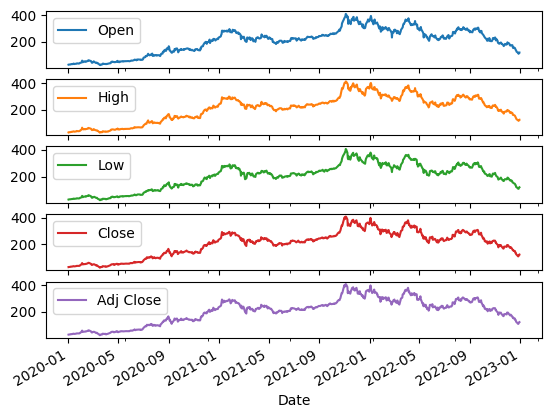

In [28]:
# Gráficas de la series de tiempo de cada año usando subplots
df_Tesla.plot(subplots=True)
plt.show()


## Obtenga las gráficas de caja por mes de los precios de cierre del 2022.



In [29]:
df_Tesla_2022 = df_Tesla.loc['2022-01-01':'2022-12-31':]
df_Tesla_2022.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666
2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655
2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665
2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994
2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007


In [30]:
# precios de cierre (close) por mes
z = df_Tesla_2022.groupby(pd.Grouper(freq='M'))['Close'].mean()
z

/tmp/ipython-input-30-158971266.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  z = df_Tesla_2022.groupby(pd.Grouper(freq='M'))['Close'].mean()


,Close
Date,
2022-01-31,336.722830
2022-02-28,292.961577
2022-03-31,304.793186
2022-04-30,332.462503
2022-05-31,255.223334
2022-06-30,234.025873
2022-07-31,251.394666
2022-08-31,294.869857
2022-09-30,288.734763


In [31]:
df_Tesla_2022.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

/tmp/ipython-input-32-4198682922.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_por_mes, labels=nombres_meses)


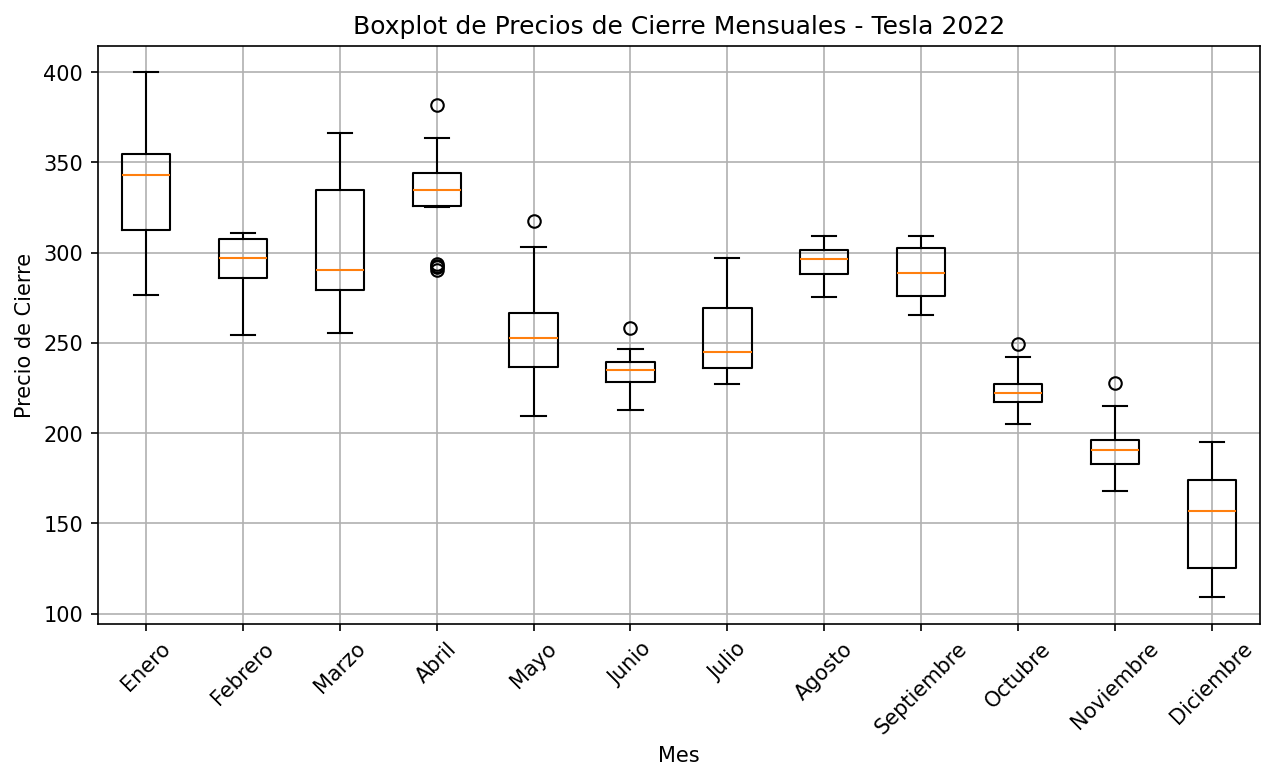

In [32]:
# Se agrupan los precios de cierre por mes (esto genera 12 listas)
datos_por_mes = [df_Tesla_2022[df_Tesla_2022.index.month == mes]['Close'].values

                 for mes in range(1, 13)] # de; 1 al 13-1=12

# se crean etiquetas de los meses
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Graficar usando boxplot
plt.figure(figsize=(10, 5), dpi=150)
plt.boxplot(datos_por_mes, labels=nombres_meses)
plt.title('Boxplot de Precios de Cierre Mensuales - Tesla 2022')
plt.xlabel('Mes')
plt.ylabel('Precio de Cierre')
plt.grid(True)

plt.xticks(rotation=45)  # rota las etiquetas del eje X 45 grados
plt.show()


## ¿Los precios de cierre de todo el 2022 se distribuyen normalmente? Justifique su respuesta.

In [33]:
# Se hará una prueba de normalidad de Shapiro-Wilk
from scipy.stats import shapiro


In [34]:
columnas = df_Tesla_2022.columns
columnas


for col in columnas:
  estadistico, p_valor = shapiro(df_Tesla_2022[col])
  print(f'Columna: {col}')
  print(f'Estadístico de prueba: {estadistico}, p-valor = {p_valor}\n')

Columna: Open
Estadístico de prueba: 0.9864212034625653, p-valor = 0.017625896645768527

Columna: High
Estadístico de prueba: 0.9858620294557905, p-valor = 0.01392609408597228

Columna: Low
Estadístico de prueba: 0.9854396501874022, p-valor = 0.011668684245805786

Columna: Close
Estadístico de prueba: 0.9863188797402815, p-valor = 0.016880104122512594

Columna: Adj Close
Estadístico de prueba: 0.9863188797402815, p-valor = 0.016880104122512594



Como prueba de significación estadística, se establecen las siguientes hipótesis:

Hipótesis nula $(H_0)$: La muestra proviene de una distribución normal.
Aceptamos $H_0$
 si el $valor-p>0.05$

Hipótesis alternativa $(
H_a)$: La muestra no proviene de una distribución normal.
Aceptamos $H_a$
 si el $valor-p <0.05$

Un valor
, indica evidencia suficiente contra la normalidad de los datos, sugiriendo que se rechace
.

como $valor-p<0.05$ los datos no tienen una distribución normal

# 2. Guarde en un Dataframe los datos de los contaminantes principales de la zona centro de la CDMX durante el año 2021 (rama2021.xlsx en Github)

In [35]:
# se carga la ruta
ruta_contaminantes_rama_2021 = "https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/rama_2021.csv"

df_rama_2021 = pd.read_csv(ruta_contaminantes_rama_2021, parse_dates = True, index_col=0) # parse_dates = True, forza a para datos temporales
df_rama_2021.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2021-01-01,0.417782,5.712963,16.977273,23.261574,29.765494,54.327273,28.594855,1.125912
2021-01-02,0.515087,14.289894,26.782609,42.090426,33.647969,48.196481,23.465409,1.725000
2021-01-03,0.446905,12.328571,22.773256,35.714286,28.135823,39.091988,16.423676,1.548983
2021-01-04,0.580398,22.323040,31.306483,54.418052,28.824532,52.486239,23.160000,3.410019
2021-01-05,0.533105,19.386091,29.376218,49.995204,28.941374,55.916667,22.694444,5.251366


In [36]:
df_rama_2021.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2'], dtype='object')

## Obtenga las gráficas de series de tiempo de los contaminantes.

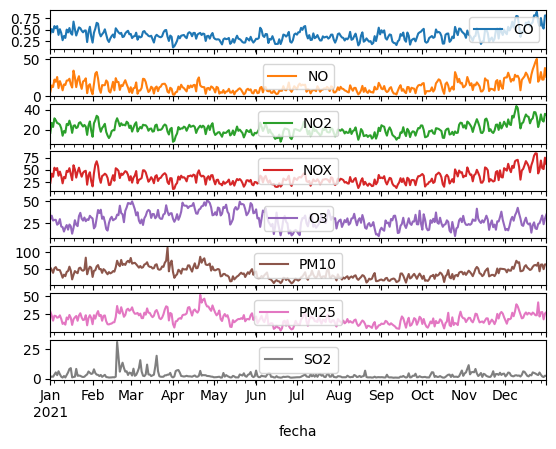

In [37]:
# serie de tiempo de los contaminantes
df_rama_2021.plot(subplots=True)
plt.show()

## Obtenga los histogramas delos contaminantes.

<Figure size 1500x1000 with 0 Axes>

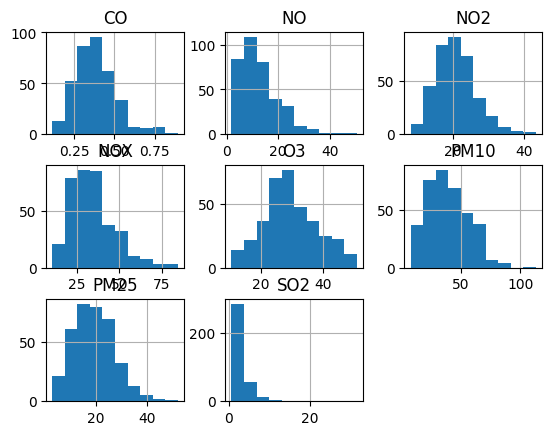

In [47]:
# histogramas de los contaminantes
plt.figure(figsize=(15, 10))
df_rama_2021.hist()
plt.show()

se modfica el código ya que salen mal ubicados

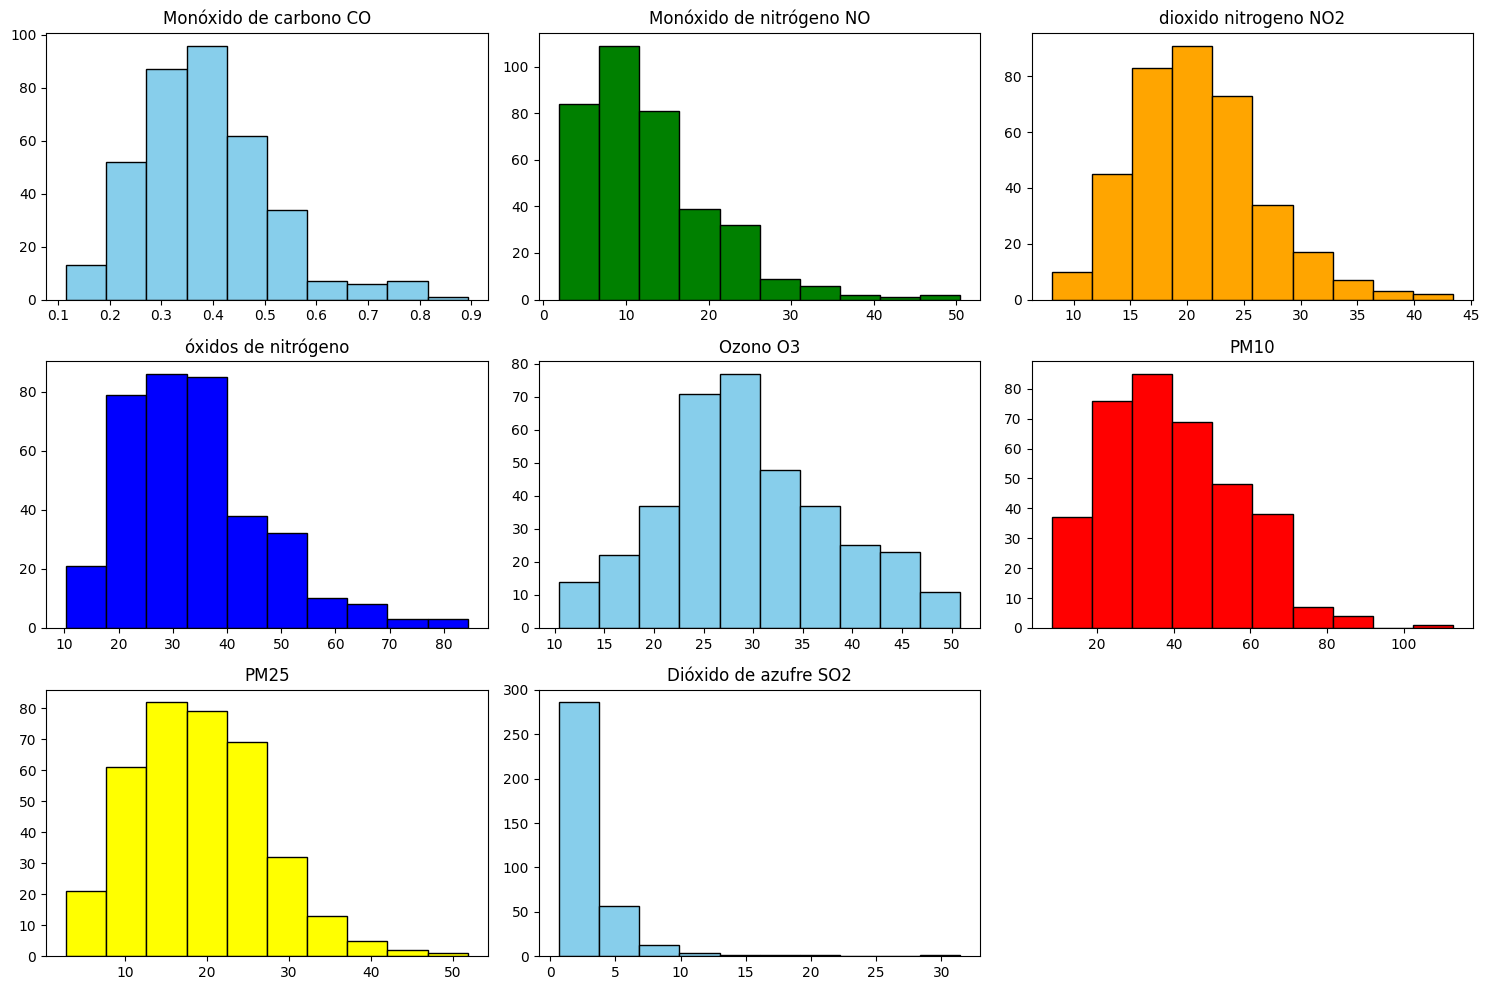

In [39]:
plt.figure(figsize=(15, 10)) # Increased figure size for better display

plt.subplot(3,3,1) # Primera subplot (3 filas, 3 columnas, posición 1 osea la del CO)
plt.hist(df_rama_2021['CO'], color='skyblue', edgecolor='black')
plt.title('Monóxido de carbono CO')

plt.subplot(3,3,2) # Segundo subplot
plt.hist(df_rama_2021['NO'], color='green', edgecolor='black')
plt.title('Monóxido de nitrógeno NO')

plt.subplot(3,3,3) # tercer subplot
plt.hist(df_rama_2021['NO2'], color='orange', edgecolor='black')
plt.title('dioxido nitrogeno NO2')

plt.subplot(3,3,4) # cuarto subplot
plt.hist(df_rama_2021['NOX'], color='blue', edgecolor='black')
plt.title('óxidos de nitrógeno')

plt.subplot(3,3,5) # quinto subplot
plt.hist(df_rama_2021['O3'], color='skyblue', edgecolor='black')
plt.title('Ozono O3')

plt.subplot(3,3,6) # sexto subplot
plt.hist(df_rama_2021['PM10'], color='red', edgecolor='black')
plt.title('PM10')

plt.subplot(3,3,7) # séptimo subplot
plt.hist(df_rama_2021['PM25'], color='yellow', edgecolor='black')
plt.title('PM25')

plt.subplot(3,3,8) # octavo subplot
plt.hist(df_rama_2021['SO2'], color='skyblue', edgecolor='black')
plt.title('Dióxido de azufre SO2')


plt.tight_layout()
plt.show()

In [40]:
df_rama_2021.describe()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.384393,12.764627,20.856912,34.092821,29.513921,39.468897,19.243143,2.926998
std,0.126995,7.759406,5.716643,13.004546,8.720568,17.125668,7.956069,2.889931
min,0.115917,1.873711,8.061630,10.345588,10.424825,8.218487,2.849315,0.672474
25%,0.296603,7.122040,16.982229,24.577778,23.554364,25.756522,13.446945,1.328494
50%,0.369077,11.108635,20.339921,32.207675,28.938838,36.848485,18.608333,2.059041
75%,0.444241,16.378723,24.280749,40.394958,35.089474,50.811414,24.212329,3.414747
max,0.892700,50.499048,43.454073,84.385199,50.881068,112.847769,51.795139,31.461741


## Obtenga un Dataframe con el resumen de 5 números, asimetría y kurtosis para todos los contaminantes.

In [41]:
# Dataframe con el resumen de 5 números
df_rama_2021.skew() # asimetría

,0
CO,0.980338
NO,1.319527
NO2,0.667754
NOX,0.986272
O3,0.257157
PM10,0.537649
PM25,0.635783
SO2,4.461197


como los coeficientes se asimetría son positivos esto indica que tienen una sesgi a la derecha

In [42]:
df_rama_2021.kurt() # curtosis

,0
CO,1.610452
NO,2.470978
NO2,0.889447
NOX,1.223836
O3,-0.363118
PM10,0.117422
PM25,0.686561
SO2,31.876715


In [43]:
# resumene de 5 números con asimetría y curtosis
resumen_estadistico = df_rama_2021.describe()
resumen_estadistico

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.384393,12.764627,20.856912,34.092821,29.513921,39.468897,19.243143,2.926998
std,0.126995,7.759406,5.716643,13.004546,8.720568,17.125668,7.956069,2.889931
min,0.115917,1.873711,8.061630,10.345588,10.424825,8.218487,2.849315,0.672474
25%,0.296603,7.122040,16.982229,24.577778,23.554364,25.756522,13.446945,1.328494
50%,0.369077,11.108635,20.339921,32.207675,28.938838,36.848485,18.608333,2.059041
75%,0.444241,16.378723,24.280749,40.394958,35.089474,50.811414,24.212329,3.414747
max,0.892700,50.499048,43.454073,84.385199,50.881068,112.847769,51.795139,31.461741


In [44]:
# etiquetas
etiquetas = df_rama_2021.columns

## Obtenga los gráficos de caja de los contaminantes. ¿Cuál contaminante fué el que más detectado durante 2021?



/tmp/ipython-input-45-3913466248.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_rama_2021, labels = etiquetas) # se mandar a graficar todos


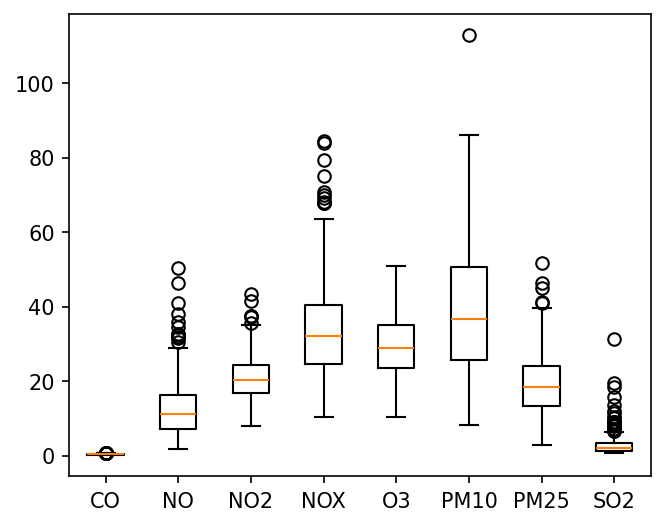

In [45]:
# Graficar usando boxplot
plt.figure(figsize=(5, 4), dpi=150)
plt.boxplot(df_rama_2021, labels = etiquetas) # se mandar a graficar todos
plt.show()


se gráfica con mejor presentación en horizontal

/tmp/ipython-input-46-2149949413.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_rama_2021, labels = etiquetas, vert = False, patch_artist= True) # se mandar a graficar todos


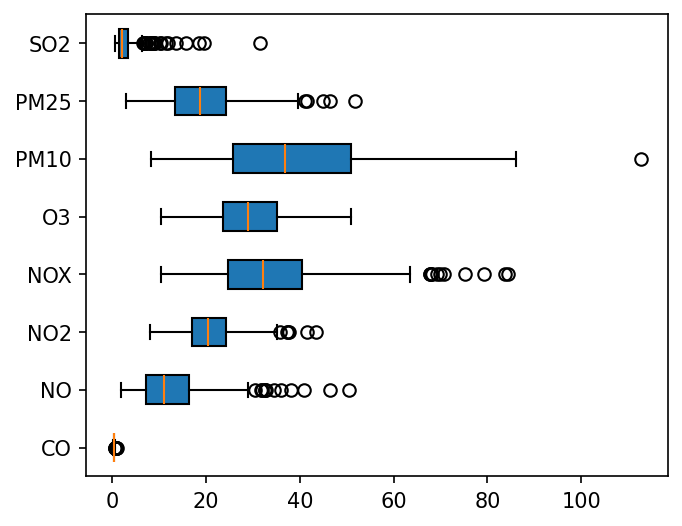

In [46]:
plt.figure(figsize=(5, 4), dpi=150)
plt.boxplot(df_rama_2021, labels = etiquetas, vert = False, patch_artist= True) # se mandar a graficar todos
# patch_artist: rellena la caja
plt.show()

## Realice una prueba de contraste de normalidad de los datos.



## **Prueba de Shapiro-Wilk**

En la prueba de Shapiro-Wilk, el estadístico de prueba es $W$, el cual se define formalmente como:

$$W=\frac{\left(\sum_{i=1}^{n}a_ix_{(i)}\right)^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

donde:

* $x_{(i)}$ son los datos ordenados de menor a mayor
* $\bar{x}$ es la media muestral
* $a_i$ son constantes calculadas en función de los valores esperados de una muestra ordenada de tamaño $n$ de una distribución normal estándar y su matriz de covarianzas

Este estadístico $W$ mide que tan cerca está la muestra a una distribución normal:
* Si $W\approx 1$: los datos **se ajustan bien** a una normal
* si $W\ll 1$: no hay evidencia de normalidad

Así el $valor-p$ es la probabilidad de obtener un valor del estadístico $W$ tan extremo o más como el observado, bajo la hipótesis nula $H_0$ de que los datos provienen de una normal, considerando un nivel se significancia $\alpha$ se realiza el siguiente contraste:

 * si $valor-p > α$ se acepta $H_0$
 * si $valor-p \leq α $ se rechaza $H_0$

por tanto como prueba de normalidad, se establecen las siguientes hipótesis:

* Hipótesis nula $(H_0)$: La muestra proviene de una distribución normal.
Aceptamos $H_0$
 si el $valor-p>0.05$

* Hipótesis alternativa $(
H_a)$: La muestra no proviene de una distribución normal.
Aceptamos $H_a$
 si el $valor-p <0.05$ Un $valor-p<0.05$
, indica evidencia suficiente contra la normalidad de los datos, sugiriendo que se rechace $H_0$

In [48]:
# se realiza la prueba de Shapiro-Wilk

from scipy.stats import shapiro

In [49]:
# Prueba de Shapiro-Wilk para los datos
columnas = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2']

for col in columnas:
    estadistico, p_value = shapiro(df_rama_2021[col])
    print(f'{col}:  Estadístico = {estadistico:.3f}, p-value = {p_value:.10f}\n')

CO:  Estadístico = 0.949, p-value = 0.0000000007

NO:  Estadístico = 0.907, p-value = 0.0000000000

NO2:  Estadístico = 0.976, p-value = 0.0000077785

NOX:  Estadístico = 0.945, p-value = 0.0000000002

O3:  Estadístico = 0.986, p-value = 0.0016302531

PM10:  Estadístico = 0.972, p-value = 0.0000018406

PM25:  Estadístico = 0.976, p-value = 0.0000085095

SO2:  Estadístico = 0.622, p-value = 0.0000000000



como todo los $valor-p$ son menores a 0.05 implica que los datos no se distribuyen bajo una normal

## De acuerdo a la prueba obtenida anteriormente. ¿Cuál es el coeficiente de correlación apropiado para obtener la correlación entre los contaminantes?

Dado que no se distributen como una normal no se puede utilizar el coeficiente de correlación de Pearson, así que lo correcto es usar el coeficiente de correlación de Spearman

In [50]:
df_rama_2021.corr(method='spearman')


,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
CO,1.000000,0.843404,0.873391,0.906800,-0.004116,0.504046,0.512779,0.299368
NO,0.843404,1.000000,0.785366,0.954812,-0.132850,0.484106,0.371816,0.295461
NO2,0.873391,0.785366,1.000000,0.924388,0.143831,0.645877,0.630509,0.478446
NOX,0.906800,0.954812,0.924388,1.000000,0.011048,0.607047,0.529378,0.404369
O3,-0.004116,-0.132850,0.143831,0.011048,1.000000,0.539238,0.640220,0.301324
PM10,0.504046,0.484106,0.645877,0.607047,0.539238,1.000000,0.895745,0.611600
PM25,0.512779,0.371816,0.630509,0.529378,0.640220,0.895745,1.000000,0.588893
SO2,0.299368,0.295461,0.478446,0.404369,0.301324,0.611600,0.588893,1.000000


## Obtenga una matríz de correlación de los contaminantes y un mapa de calor. Además, obtenga un Dataframe que muestre la correlación 2 a 2 entre los contaminantes.

In [51]:
import seaborn as sns


In [58]:
matriz_corr = df_rama_2021.corr(method='spearman')


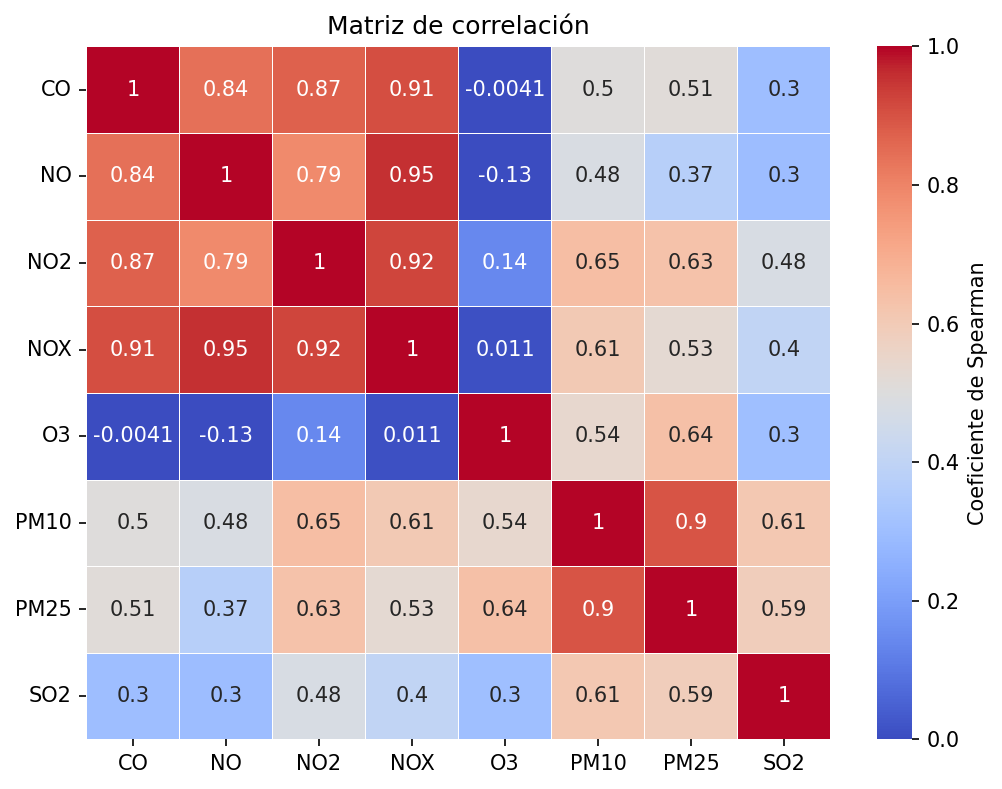

In [59]:
# Se genera la matriz y el mapa de calor
plt.figure(figsize=(8,6), dpi =150)
sns.heatmap(matriz_corr, annot=True, # annot=True:muestra los elementos de la matriz
            cmap='coolwarm',
            linewidths=0.3,
            cbar_kws={'label': 'Coeficiente de Spearman'},
           vmin = 0, vmax = 1, center = 0.5)
plt.title('Matriz de correlación', fontsize = 12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

los contaminantes que presentan mayor correlación son el $CO$ con los $NO_x$ y el $NO$ con los $NO_x$  

## Obtenga un diagrama de dispersión de los 2 contaminantes donde existe más correlación.



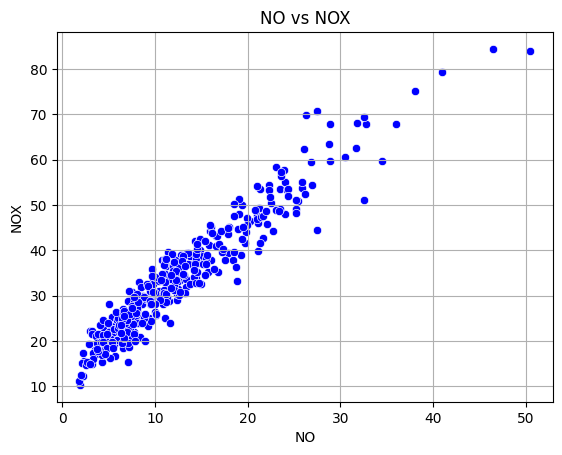

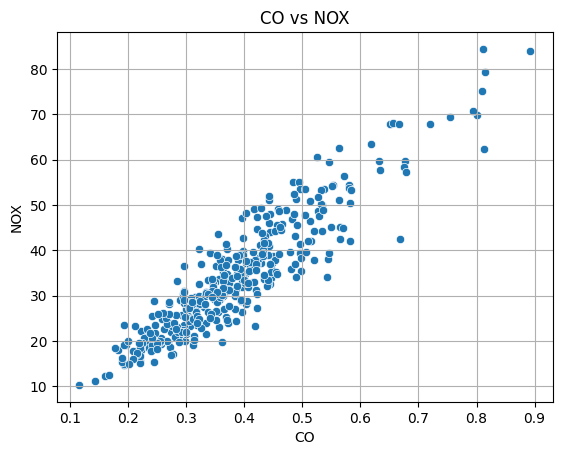

In [62]:
# 1. NO vs NOx ya que son los  más correlacionados
sns.scatterplot(data=df_rama_2021, x='NO', y='NOX', color = 'blue')
plt.title('NO vs NOX')
plt.grid(True)
plt.show()

# 2. CO vs NOx son los segundos más correlacionados
sns.scatterplot(data=df_rama_2021, x='CO', y='NOX')
plt.title('CO vs NOX')
plt.grid(True)
plt.show()

## Obtenga una gráfica que muestre todos los diagramas de dispersión entre todos los contaminantes.

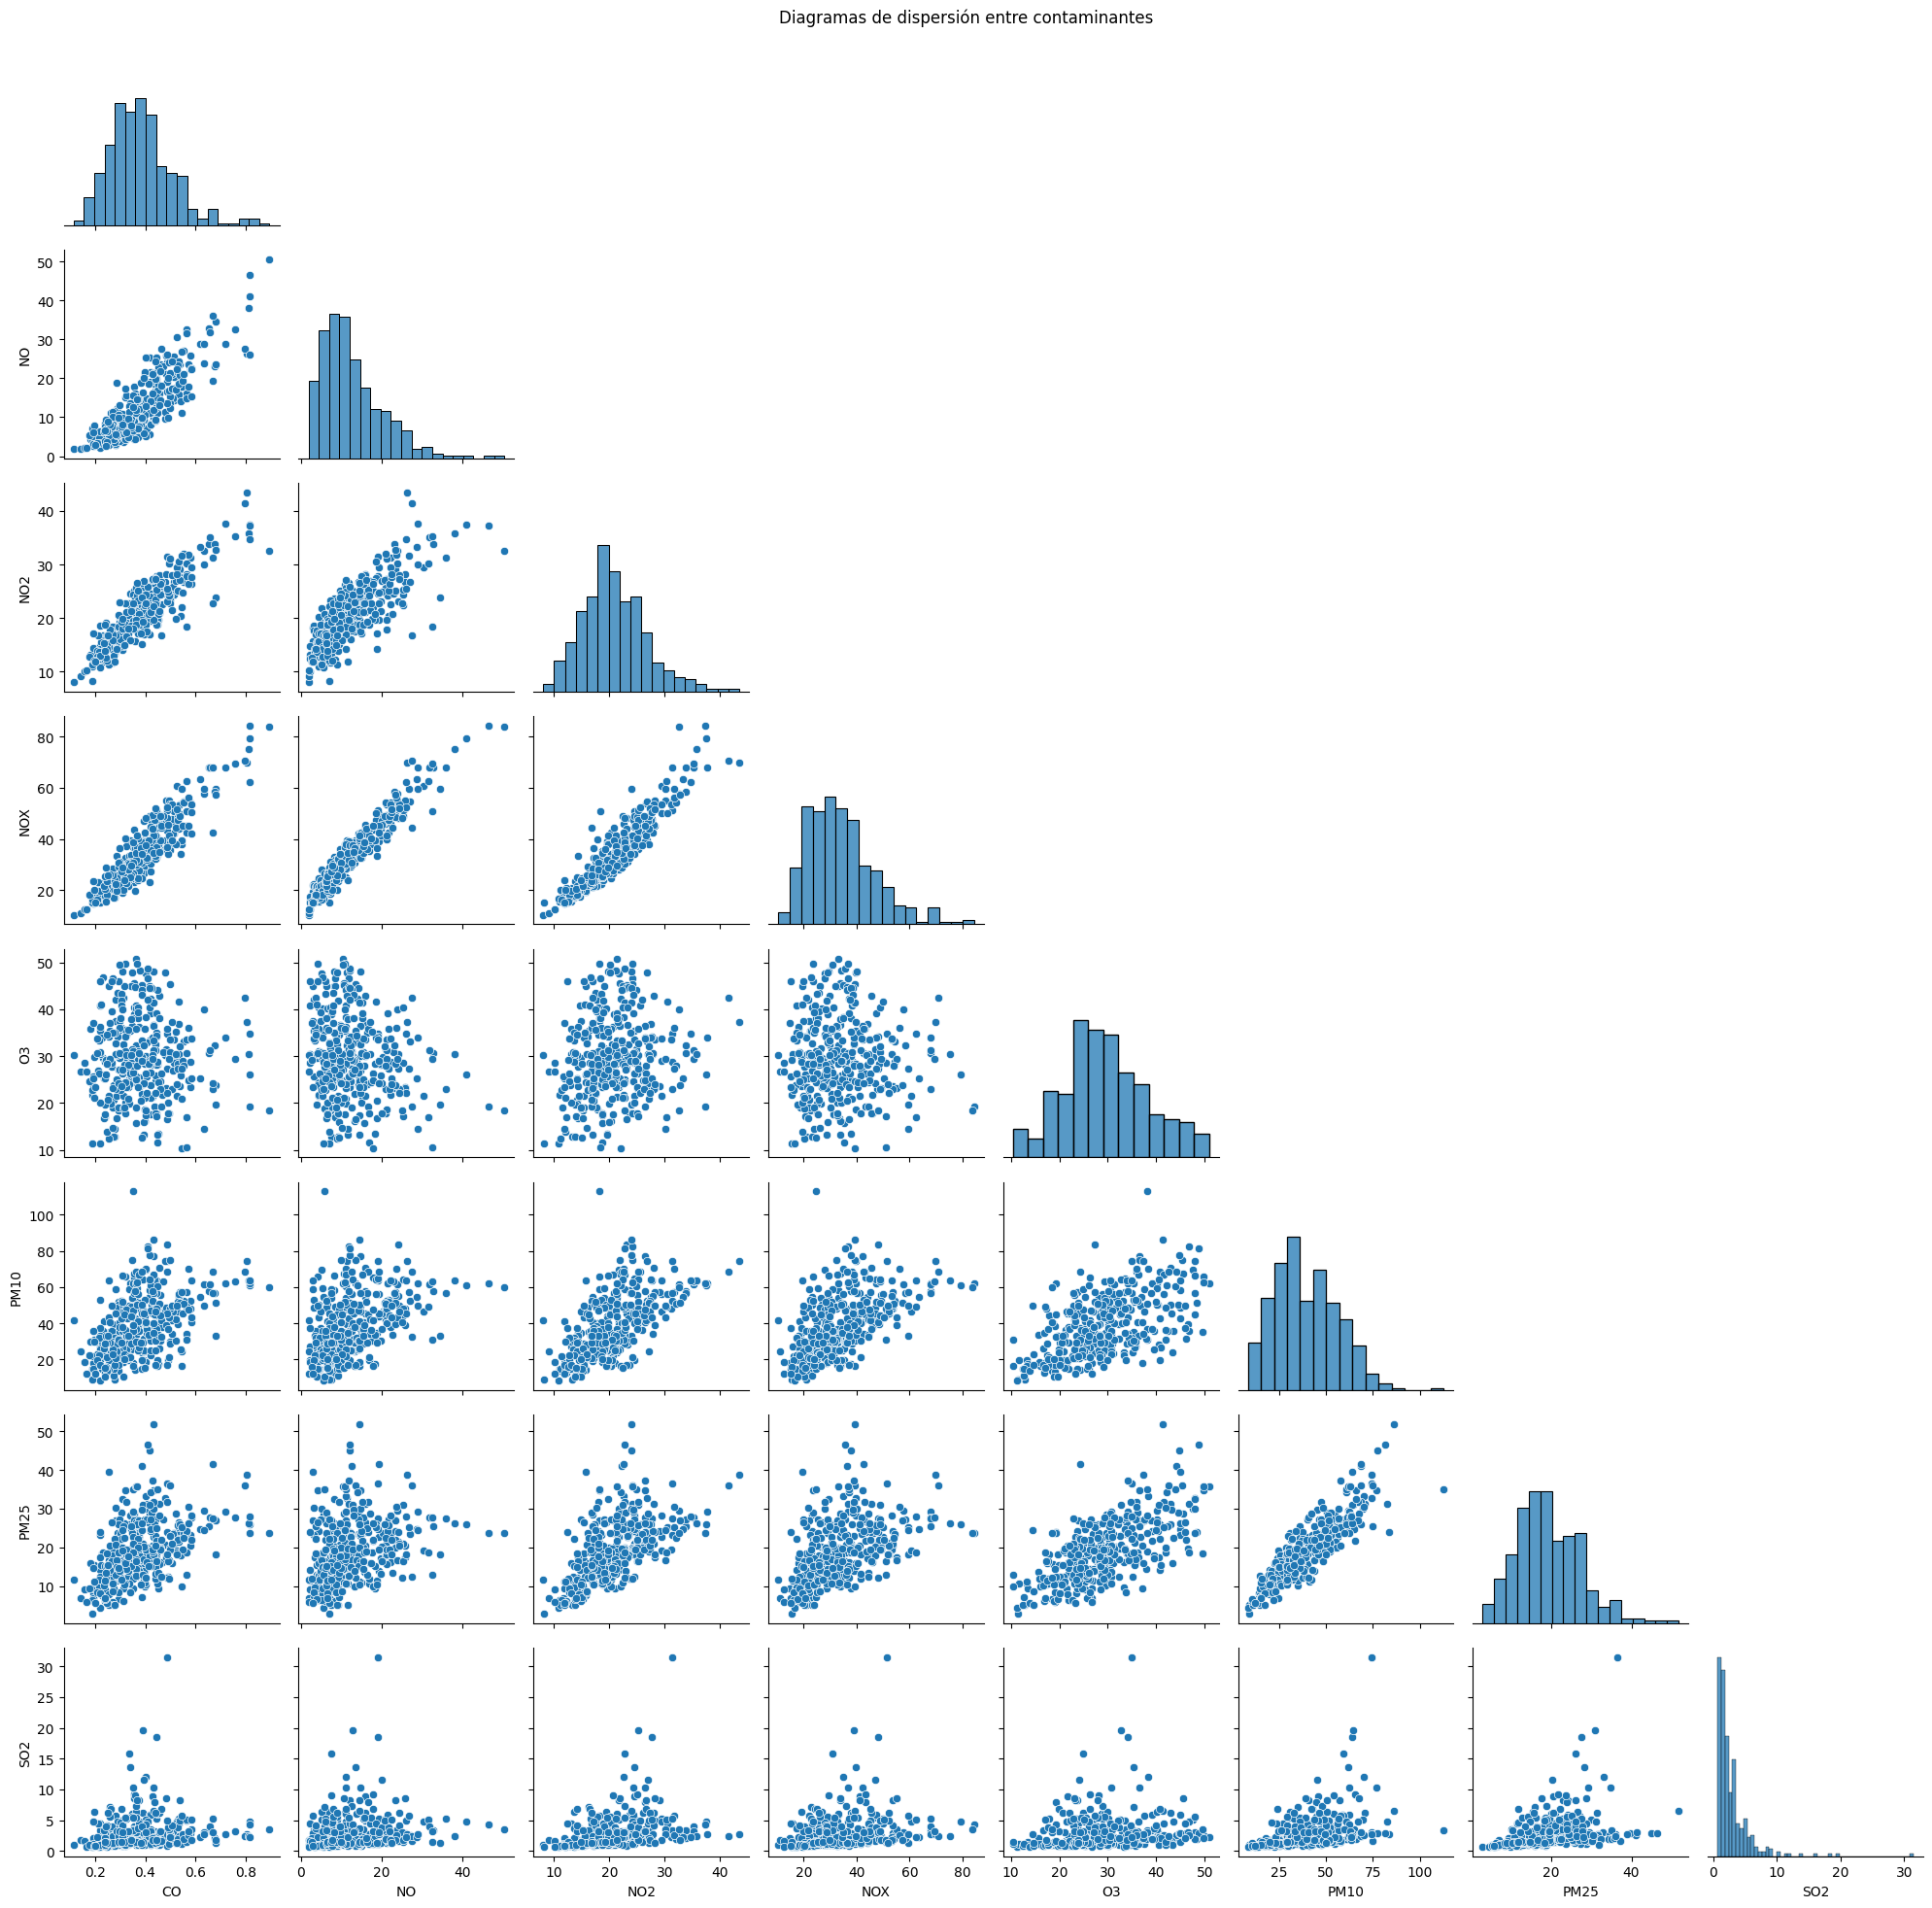

In [73]:
# Diagrama de dispersión de todos los contaminantes

contaminantes = df_rama_2021

# Crear la matriz de gráficos de dispersión
sns.pairplot(contaminantes, corner=True) # ya que la matriz de correlación es
# simétrica se puede graficar de forma trangular inferior con corner=True

plt.suptitle("Diagramas de dispersión entre contaminantes")
plt.tight_layout()
plt.show()


## Comprobar si existe correlación entre los contaminantes y los factores meteorológicos contenidos en redmet_2021.csv en Github.



In [74]:
# comporbar correlación en redmet_2021
ruta_redmet_2021 = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/redmet_2021.csv'
df_redmet_2021 = pd.read_csv(ruta_redmet_2021, parse_dates = True, index_col=0) # parse_dates = True, forza a para datos temporales
df_redmet_2021

,RH,TMP,WDR,WSP
fecha,,,,
2021-01-01,32.645714,12.519203,162.673611,2.697743
2021-01-02,29.782353,12.918297,166.820467,1.954039
2021-01-03,32.780488,14.381852,179.656881,1.960917
2021-01-04,36.739563,13.840727,190.878403,1.705808
2021-01-05,39.845996,13.591215,163.173832,1.834019
...,...,...,...,...
2021-12-27,40.975652,15.348174,158.294235,1.595626
2021-12-28,54.810105,14.846975,156.866534,2.083865
2021-12-29,44.001754,14.667399,158.020080,2.032129


In [76]:
datos = pd.concat([df_rama_2021,df_redmet_2021],axis=1)


In [77]:
datos.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,RH,TMP,WDR,WSP
fecha,,,,,,,,,,,,
2021-01-01,0.417782,5.712963,16.977273,23.261574,29.765494,54.327273,28.594855,1.125912,32.645714,12.519203,162.673611,2.697743
2021-01-02,0.515087,14.289894,26.782609,42.090426,33.647969,48.196481,23.465409,1.725000,29.782353,12.918297,166.820467,1.954039
2021-01-03,0.446905,12.328571,22.773256,35.714286,28.135823,39.091988,16.423676,1.548983,32.780488,14.381852,179.656881,1.960917
2021-01-04,0.580398,22.323040,31.306483,54.418052,28.824532,52.486239,23.160000,3.410019,36.739563,13.840727,190.878403,1.705808
2021-01-05,0.533105,19.386091,29.376218,49.995204,28.941374,55.916667,22.694444,5.251366,39.845996,13.591215,163.173832,1.834019


In [78]:
# calcular matriz de correlación
corr_mat = datos.corr(method='spearman')


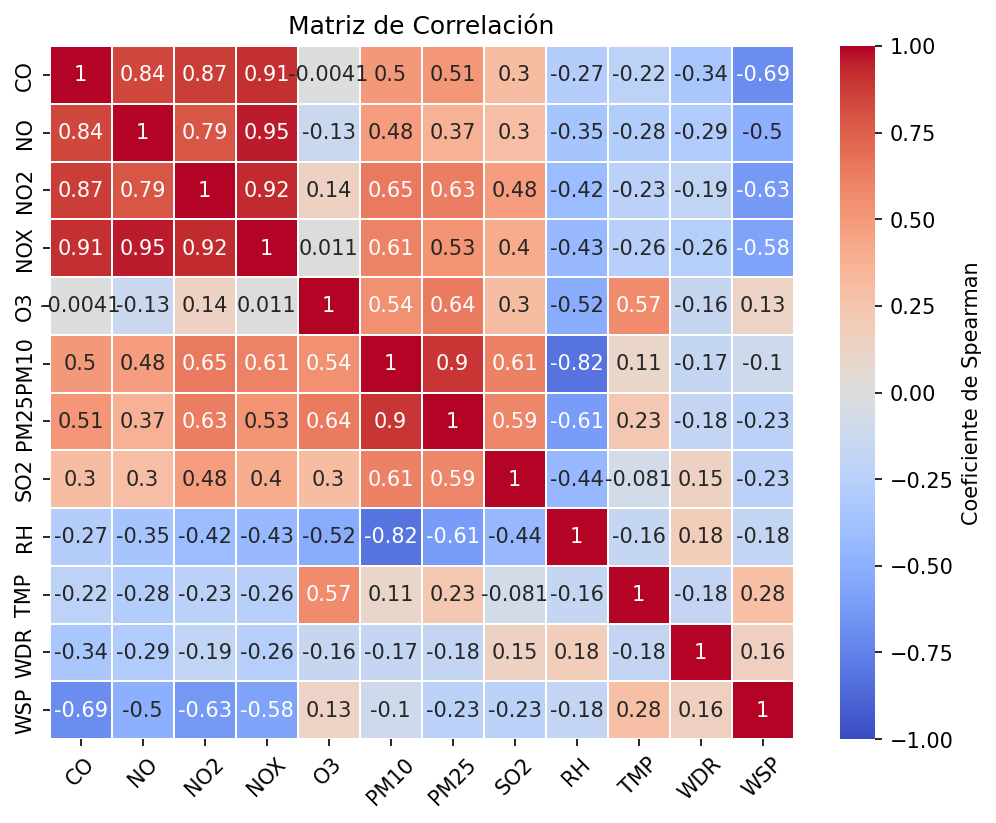

In [80]:
plt.figure(figsize=(8, 6),dpi=150)
sns.heatmap(corr_mat, annot=True,
            cmap='coolwarm',
            linewidths=0.2,
            cbar_kws={'label': 'Coeficiente de Spearman'},
           vmin = -1, vmax = 1, center = 0)
plt.title('Matriz de Correlación', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **Conclusiones**
Se puede apreciar que existe correlación negativa de la humedad relativa $RH$ con las $PM_{10}$ indicando que a menor humedad se tienen mayor $PM_{10}$, otra correlación negativa aunque menor se da con $WSP$ (velocidad del viento) y el $CO$ se puede interpretar que a mayor velocidad del viento, menor concentración de $CO$, porque se dispersa más fácil, o bien si la velocidad del viento es baja se acumula el $CO$, pasa lo mismo con el $NO_2$ y $NO_x$ ya que son contaminantes primarios, otra correlación pero ahora positiva se observa entre la $TMP$ temperatura del aire y el ozono $O_3$ que es un contaminante secundario, el cual se forma a partir de reacciones fotoquímicasentre los óxidos de nitrógeno $NO_x$ y los compuestos orgánicos volátiles $COV's$, en presencia de luz solar y calor, entonces a mayor temperatura, mayor formación de $O_3$